___

<p style="text-align: center;"><img src="https://techproeducation.com/wp-content/uploads/2022/01/Calisma-Yuzeyi-1-kopya-5-1-768x126.png" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

Finally, you should clustered customers using the ***K-Means Clustering*** method, after that label the clusters.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
%matplotlib inline
plt.rcParams["figure.figsize"] = (14,8)

import warnings

warnings.filterwarnings('ignore')
#pd.set_option('display.max_rows', 500)

#### Load Dataset

In [2]:
X = pd.read_csv("Mall_Customers.csv")
X.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


Data setinde; musterilere ait ID numaralari,cinsiyet, yas, yillik gelir, 1-100 arasinda musterinin yaptigi harcamalarin skorlamasi var. Skorlari dusuk olanlar az harcama yapan, yuksek olanlar cok harcama yapan musteriler. 

#### Explore Data

You can rename columns to more usable, if you need.

In [85]:
X.rename(columns={'Annual Income (k$)': 'anual_income', 'Spending Score (1-100)': 'spending_score'}, inplace=True)
X

,CustomerID,Gender,Age,anual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


---
---

## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





In [86]:
X.drop(columns='CustomerID', axis=1, inplace=True) #droping the irrelevant column

In [87]:
X

,Gender,Age,anual_income,spending_score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


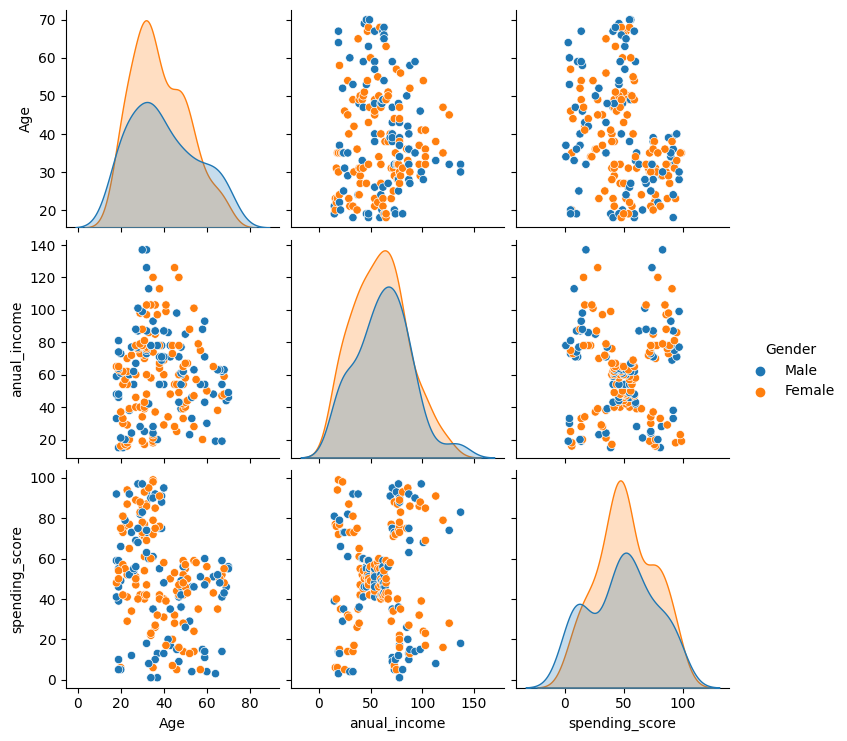

In [13]:
sns.pairplot(X, hue = 'Gender');

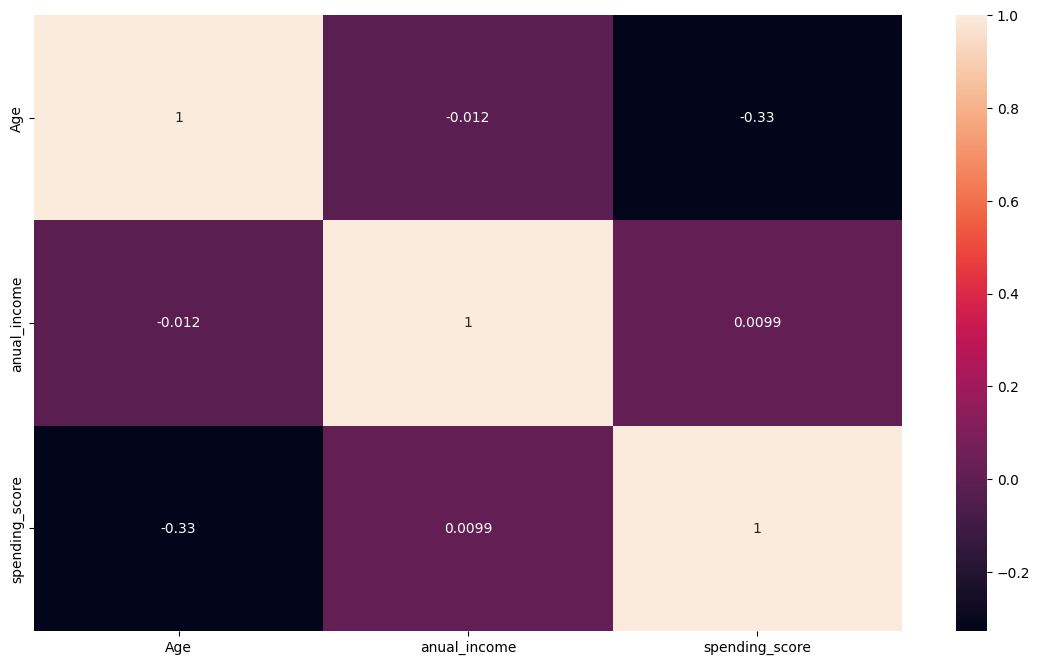

In [16]:
sns.heatmap(X.corr(), annot=True);

Text(0, 0.5, 'Count')

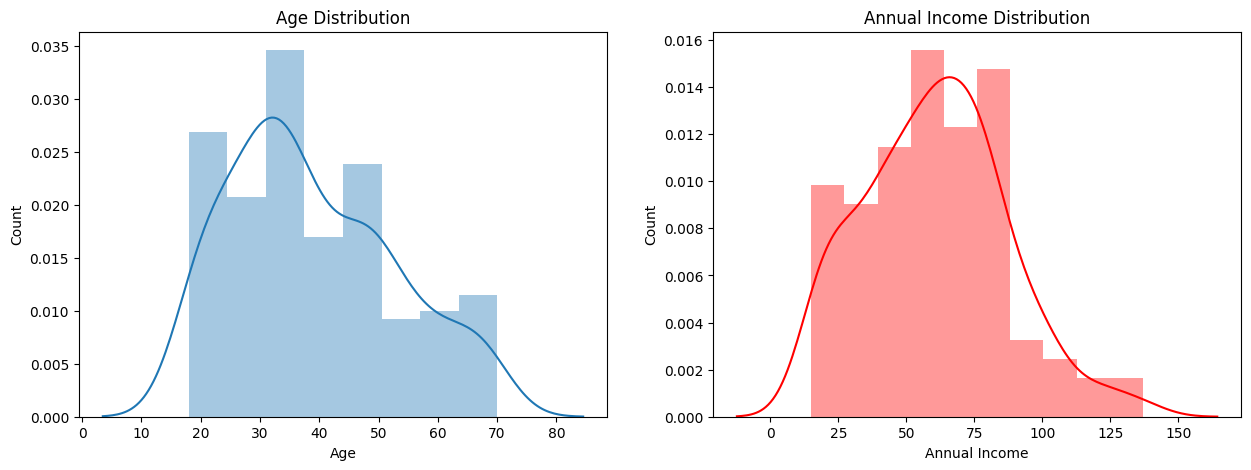

In [17]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.distplot(X['Age'])
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')

plt.subplot(1,2,2)
sns.distplot(X['anual_income'],color='red')
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('Count')

(-1.25, 1.25, -1.25, 1.25)

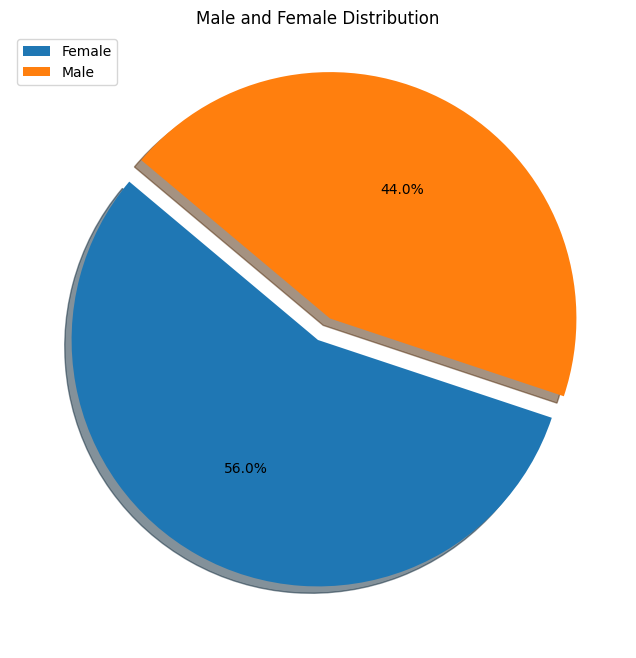

In [18]:
plt.figure(figsize=(8,8))

explode = [0,0.1]
plt.pie(X['Gender'].value_counts(),explode=explode,autopct='%1.1f%%',shadow=True,startangle=140)
plt.legend(labels=['Female','Male'])
plt.title('Male and Female Distribution')
plt.axis('off')

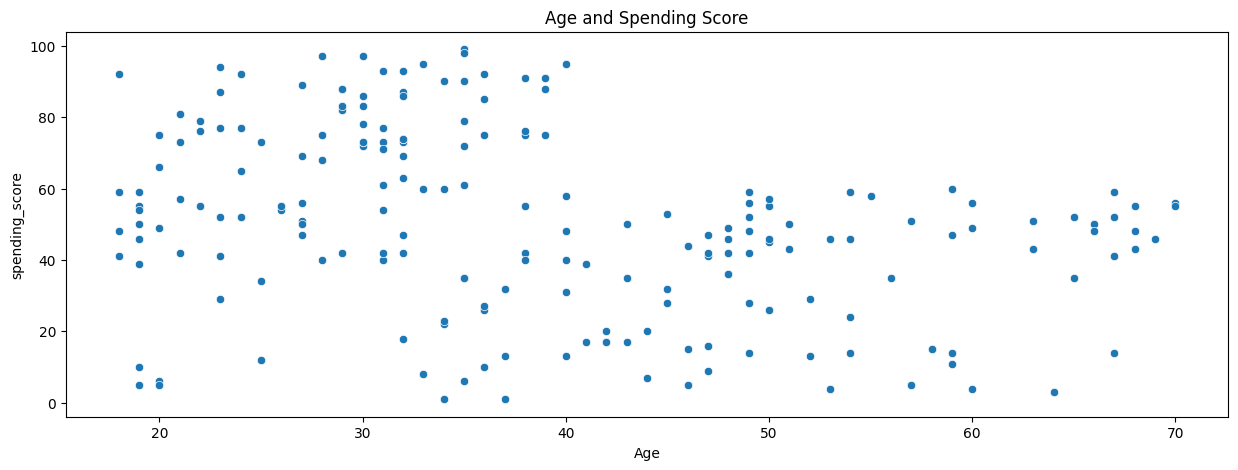

In [21]:
plt.figure(figsize=(15,5))
sns.scatterplot(X['Age'], X['spending_score'])
plt.title('Age and Spending Score')
plt.show()

---
---

## 3. Cluster Analysis

The main purpose of this project is to perform [cluster analysis](https://en.wikipedia.org/wiki/Cluster_analysis#:~:text=Cluster%20analysis%20or%20clustering%20is,in%20other%20groups%20(clusters).) with the [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) algorithm. 

You can perform many [cluster analysis](http://www.stat.columbia.edu/~madigan/W2025/notes/clustering.pdf) using different variables. If you use a maximum of two variables for each cluster analysis, you can identify cluster labels more clearly.

First, the K-Means algorithm expects you to determine the number of clusters (*n_clusters*). You can determine the optimal number of clusters for each cluster analysis in various ways. In this case, you are expected to use the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering).

Finally, different information is obtained in each analysis. Therefore, different labeling should be done as a result of each cluster analysis. 

Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score - X1

In [27]:
X1 = X[["Age",'spending_score']]
X1.head()

,Age,spending_score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


In [28]:
from sklearn.neighbors import BallTree
import numpy as np
import pandas as pd
def hopkins(data_frame, sampling_size):
    """Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express
    no clusterability and a score tending to 0 express a high cluster tendency.
    Parameters
    ----------
    data_frame : numpy array
        The input dataset
    sampling_size : int
        The sampling size which is used to evaluate the number of DataFrame.
    Returns
    ---------------------
    score : float
        The hopkins score of the dataset (between 0 and 1)
    Examples
    --------
    >>> from sklearn import datasets
    >>> from pyclustertend import hopkins
    >>> X = datasets.load_iris().data
    >>> hopkins(X,150)
    0.16
    """
    if type(data_frame) == np.ndarray:
        data_frame = pd.DataFrame(data_frame)
    # Sample n observations from D : P
    if sampling_size > data_frame.shape[0]:
        raise Exception(
            'The number of sample of sample is bigger than the shape of D')
    data_frame_sample = data_frame.sample(n=sampling_size)
    # Get the distance to their neirest neighbors in D : X
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(data_frame_sample, k=2)
    data_frame_sample_distances_to_nearest_neighbours = dist[:, 1]
    # Randomly simulate n points with the same variation as in D : Q.
    max_data_frame = data_frame.max()
    min_data_frame = data_frame.min()
    uniformly_selected_values_0 = np.random.uniform(min_data_frame[0], max_data_frame[0], sampling_size)
    uniformly_selected_values_1 = np.random.uniform(min_data_frame[1], max_data_frame[1], sampling_size)
    uniformly_selected_observations = np.column_stack((uniformly_selected_values_0, uniformly_selected_values_1))
    if len(max_data_frame) >= 2:
        for i in range(2, len(max_data_frame)):
            uniformly_selected_values_i = np.random.uniform(min_data_frame[i], max_data_frame[i], sampling_size)
            to_stack = (uniformly_selected_observations, uniformly_selected_values_i)
            uniformly_selected_observations = np.column_stack(to_stack)
    uniformly_selected_observations_df = pd.DataFrame(uniformly_selected_observations)
    # Get the distance to their neirest neighbors in D : Y
    tree = BallTree(data_frame, leaf_size=2)
    dist, _ = tree.query(uniformly_selected_observations_df, k=1)
    uniformly_df_distances_to_nearest_neighbours = dist
    # return the hopkins score
    x = sum(data_frame_sample_distances_to_nearest_neighbours)
    y = sum(uniformly_df_distances_to_nearest_neighbours)
    if x + y == 0:
        raise Exception('The denominator of the hopkins statistics is null')
    return x / (x + y)[0]


# normalde bu fonksiyonumuz pyclustertend'ın hopkins kütüphanesinde var. Ancak oluşabilecek hatalara karşı 
# doğrudan fonksiyonun kendisini kullanacağız. Bundan dolayı pyclustertend'ı install etmemize gerek yoktur! 
                                                #!pip install pyclustertend --user
                                                # from pyclustertend import hopkins

In [39]:
hopkins(X1, X1.shape[0]) #Below 50 is ideal, #We want Hopkins score close to 0

0.2723897290878797

#### *i. Create a new dataset with two variables of your choice*

#### *ii. Determine optimal number of clusters*

### Why silhouette_score is negative?

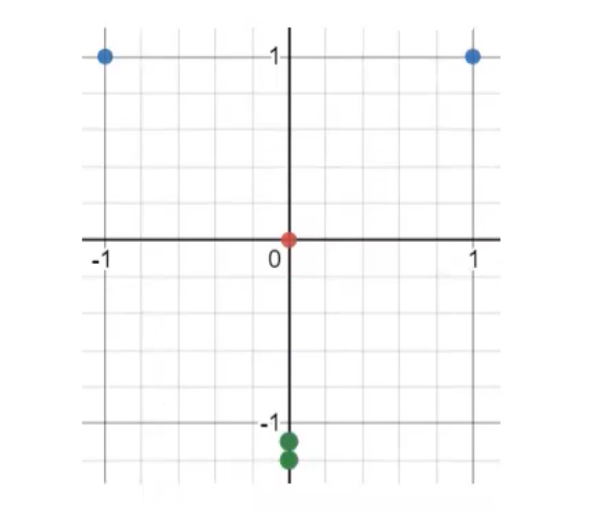

__Silhouette Score-->__ (1-√2) / √2 = -0.29

#### *iii. Apply K Means*

In [40]:
from sklearn.preprocessing import StandardScaler, RobustScaler,MinMaxScaler
from sklearn.cluster import KMeans

#### *iv. Visualizing and Labeling All the Clusters*

In [41]:
scaler = StandardScaler()
X1 = scaler.fit_transform(X1)

In [43]:
ssd = [] # sum of squared distance
K = range(2,10)
for k in K:
    model = KMeans(n_clusters=k)
    model.fit(X1)
    ssd.append(model.inertia_)

In [44]:
ssd

[189.38749033992428,
 124.32628617921526,
 89.84853511210656,
 71.24407583828105,
 53.128438356294005,
 45.92135679239463,
 39.39966485132034,
 33.75048299358161]

Text(0.5, 1.0, 'elbow method')

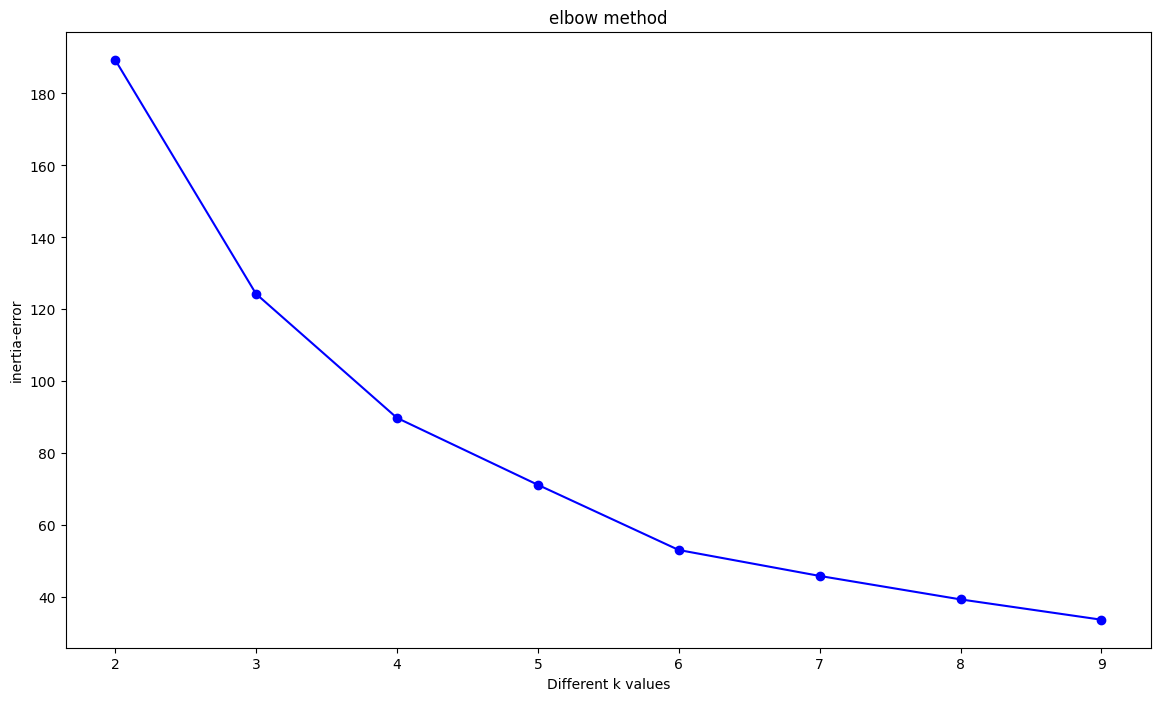

In [45]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method")

In [46]:
from yellowbrick.cluster import KElbowVisualizer

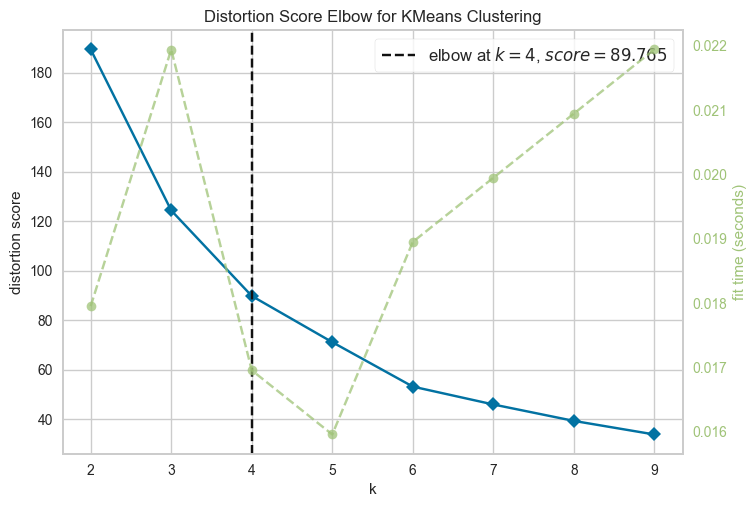

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [47]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(X1)
visu.poof()

In [48]:
from sklearn.metrics import silhouette_score
silhouette_score(X1, kmeans.labels_) #Looking for higher than 0.5 Silhoutte Score


0.4289593119816042

In [49]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=101)
    kmeans.fit(X1)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X1, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4721271643062346
For n_clusters=3, the silhouette score is 0.43952990002101927
For n_clusters=4, the silhouette score is 0.4383860846531993
For n_clusters=5, the silhouette score is 0.42369111306686563
For n_clusters=6, the silhouette score is 0.4566283030197353
For n_clusters=7, the silhouette score is 0.4114882432090666
For n_clusters=8, the silhouette score is 0.41807241036672366


In [50]:
model = KMeans(n_clusters=4)
model.fit(X1)

KMeans(n_clusters=4)

In [51]:
model.inertia_ #Looking for lower inertia

89.7652167658615

In [52]:
model = KMeans(n_clusters=3)
model.fit(X1)

KMeans(n_clusters=3)

In [53]:
model.inertia_

124.32628617921526

In [54]:
model = KMeans(n_clusters=4)
model.fit(X1)

KMeans(n_clusters=4)

### Clustering based on Annual Income and Spending Score - X2

In [55]:
X

,Gender,Age,anual_income,spending_score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [56]:
X2 = X[["anual_income", "spending_score"]]
X2.head()

,anual_income,spending_score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


#### *i. Create a new dataset with two variables of your choice*

#### *ii. Determine optimal number of clusters*

#### *iii. Apply K Means*

#### *iv. Visualizing and Labeling All the Clusters*

In [57]:
hopkins(X2, X2.shape[0]) #Similar hopkins result

0.30005093781783887

In [58]:
scaler = StandardScaler()
X2 = scaler.fit_transform(X2)

In [59]:
ssd = [] # sum of squared distance
K = range(2,10)
for k in K:
    model = KMeans(n_clusters=k)
    model.fit(X2)
    ssd.append(model.inertia_)

In [60]:
ssd

[269.0167937490666,
 157.70400815035947,
 108.92131661364357,
 65.5684081557168,
 55.067795914519664,
 44.91118554999014,
 37.24321153347671,
 32.40665967645661]

Text(0.5, 1.0, 'elbow method')

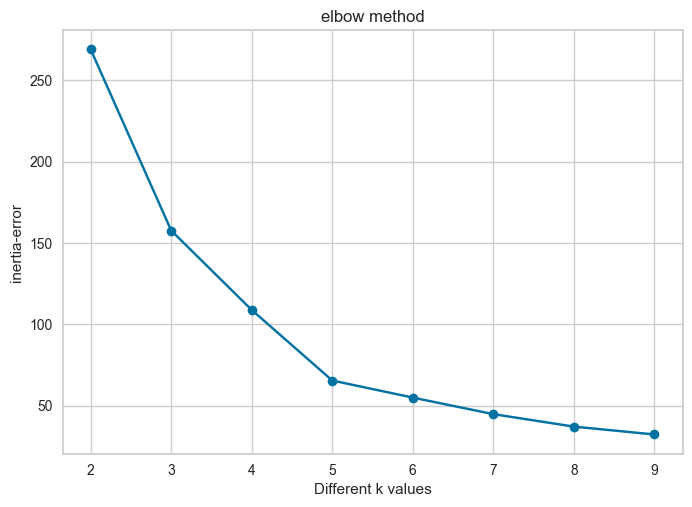

In [61]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method")

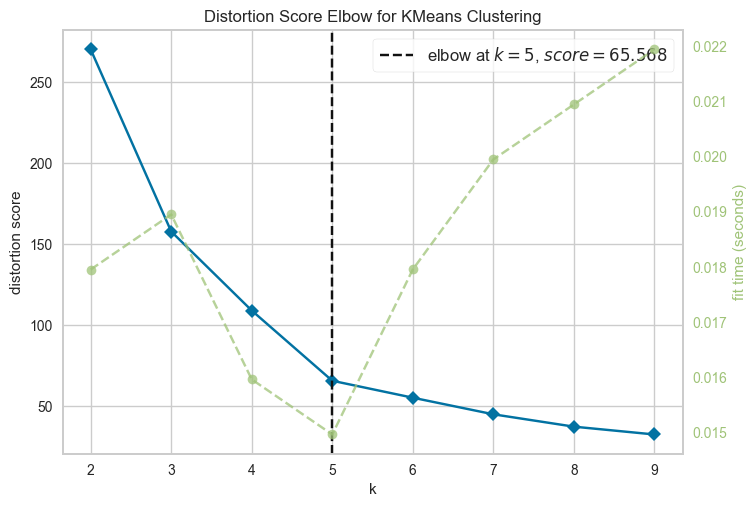

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [62]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,10))
visu.fit(X2)
visu.poof()

In [63]:
silhouette_score(X2, kmeans.labels_)


0.455477460588866

In [66]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=101)
    kmeans.fit(X2)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.3093014040985521
For n_clusters=3, the silhouette score is 0.46658474419000145
For n_clusters=4, the silhouette score is 0.4939069237513199
For n_clusters=5, the silhouette score is 0.5546571631111091
For n_clusters=6, the silhouette score is 0.5377141165734254
For n_clusters=7, the silhouette score is 0.5263454490712252
For n_clusters=8, the silhouette score is 0.45543473014577757


In [93]:
model = KMeans(n_clusters=5)
model.fit(X2)

KMeans(n_clusters=5)

In [94]:
model.inertia_


65.5684081557168

In [100]:
X["cluster"] = model.labels_


In [102]:
X

,Gender,Age,anual_income,spending_score,cluster
0,Male,19,15,39,2
1,Male,21,15,81,1
2,Female,20,16,6,2
3,Female,23,16,77,1
4,Female,31,17,40,2
...,...,...,...,...,...
195,Female,35,120,79,3
196,Female,45,126,28,0
197,Male,32,126,74,3
198,Male,32,137,18,0


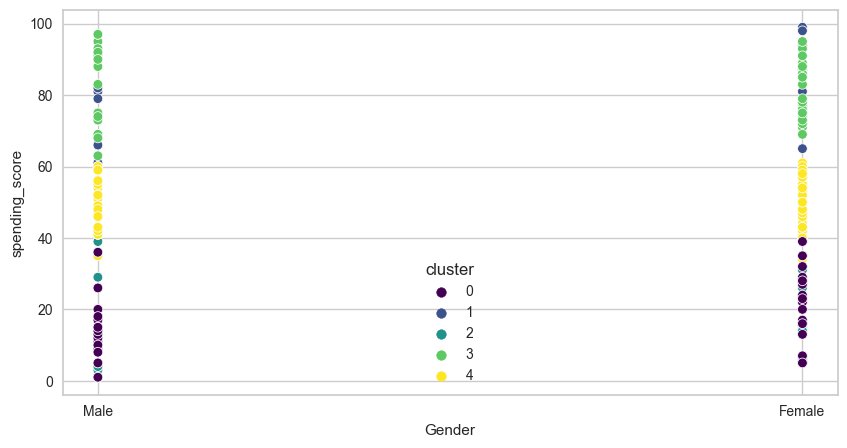

In [103]:
plt.figure(figsize=(10,5))
sns.scatterplot(X["Gender"], 
                X["spending_score"], hue= X.cluster,palette= "viridis");

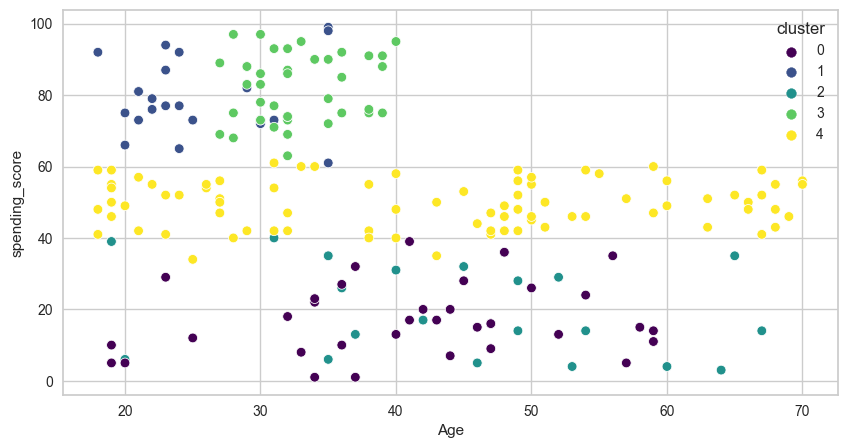

In [105]:
plt.figure(figsize=(10,5))
sns.scatterplot(X["Age"], 
                X["spending_score"], hue= X.cluster,palette= "viridis");

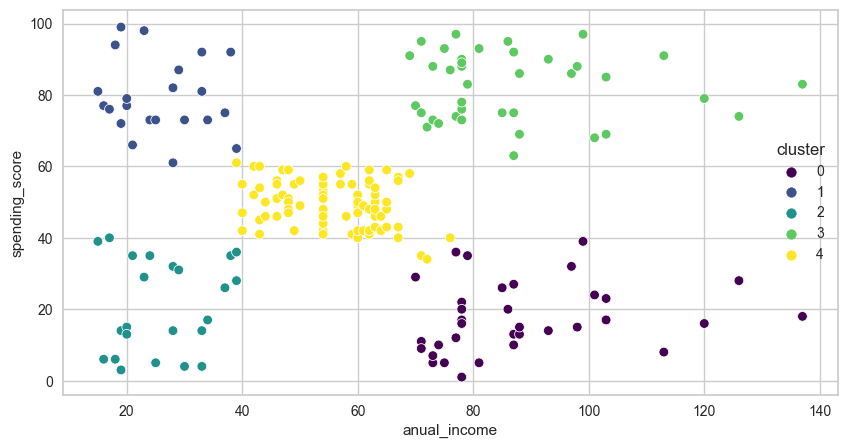

In [109]:
plt.figure(figsize=(10,5))
sns.scatterplot(X["anual_income"], 
                X["spending_score"], hue= X.cluster,palette= "viridis");

### Hierarchical Clustering

### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score- X1

In [110]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [113]:
X1 = X[["Age",'spending_score']]
X1

,Age,spending_score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [114]:
hopkins(X1, X1.shape[0]) #We want Hopkins score close to 0

0.31174573047229187

In [115]:
hc_ward = linkage (y= X1, method ="ward") 
hc_complete = linkage (X1, "complete") 
hc_average = linkage (X1, "average") 
hc_single= linkage(X1 ,"single") 

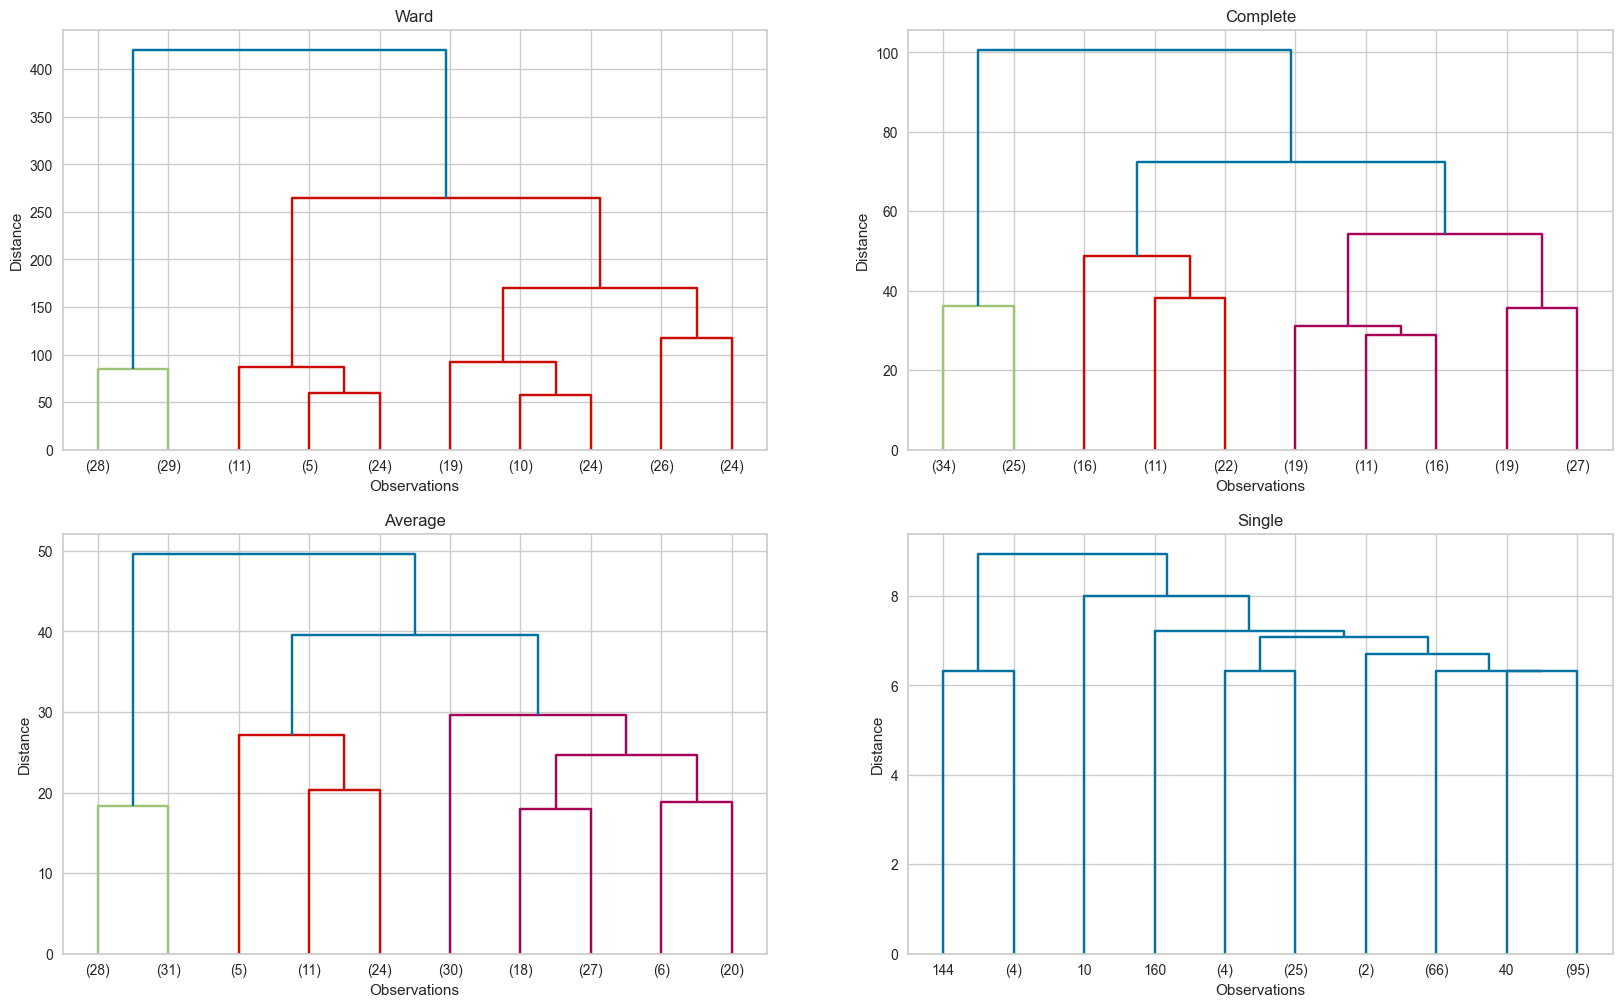

In [116]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp' , p=10); 

In [118]:
K= range (2,10)
for k in K:
    model =AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X1)
    print("f'Silhouette Score for",{k}, "clusters",{silhouette_score(X1, model.labels_)})

f'Silhouette Score for {2} clusters {0.4549465643222241}
f'Silhouette Score for {3} clusters {0.4411791686353356}
f'Silhouette Score for {4} clusters {0.4602496389565028}
f'Silhouette Score for {5} clusters {0.40374071753059787}
f'Silhouette Score for {6} clusters {0.4125958704145705}
f'Silhouette Score for {7} clusters {0.4158977524079244}
f'Silhouette Score for {8} clusters {0.3883688959732531}
f'Silhouette Score for {9} clusters {0.3948151533262091}


In [119]:
model1 = AgglomerativeClustering(n_clusters=4 ,affinity = "euclidean", linkage = "ward")
model1.fit_predict(X1)

array([0, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 0, 0, 3, 0, 3,
       2, 3, 2, 3, 0, 1, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 3, 0, 3, 0, 3, 2, 3, 2, 3,
       0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 0, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 0, 3, 2, 3, 0, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3,
       2, 3], dtype=int64)

In [ ]:
X["cluster_1"] = model1.labels_


TypeError: Axes.annotate() missing 1 required positional argument: 'text'

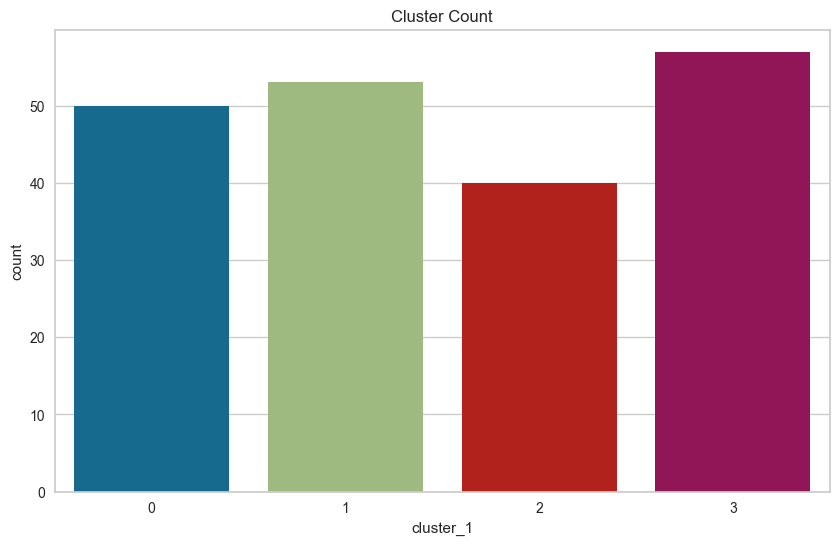

In [123]:
plt.figure(figsize=(10,6))
plt.title("Cluster Count")
ax1 = sns.countplot(x = X.cluster_1)

for p in ax1.patches:
    ax1.annotate(
        s=f"{p.get_height():1.0f}",
        xy=(p.get_x() + p.get_width() / 2., p.get_height()), 
        xycoords='data',
        ha='center', 
        va='center', 
        fontsize=11, 
        color='black',
        xytext=(0,7), 
        textcoords='offset points',
        clip_on=True,                  
    )
plt.show();

## Clustering based on Annual Income and Spending Score- x2


In [141]:
X2

,anual_income,spending_score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [128]:
hc_ward = linkage(y = X2, method = "ward")
hc_complete = linkage(X2, "complete")
hc_average = linkage(X2, "average")
hc_single = linkage(X2, "single")

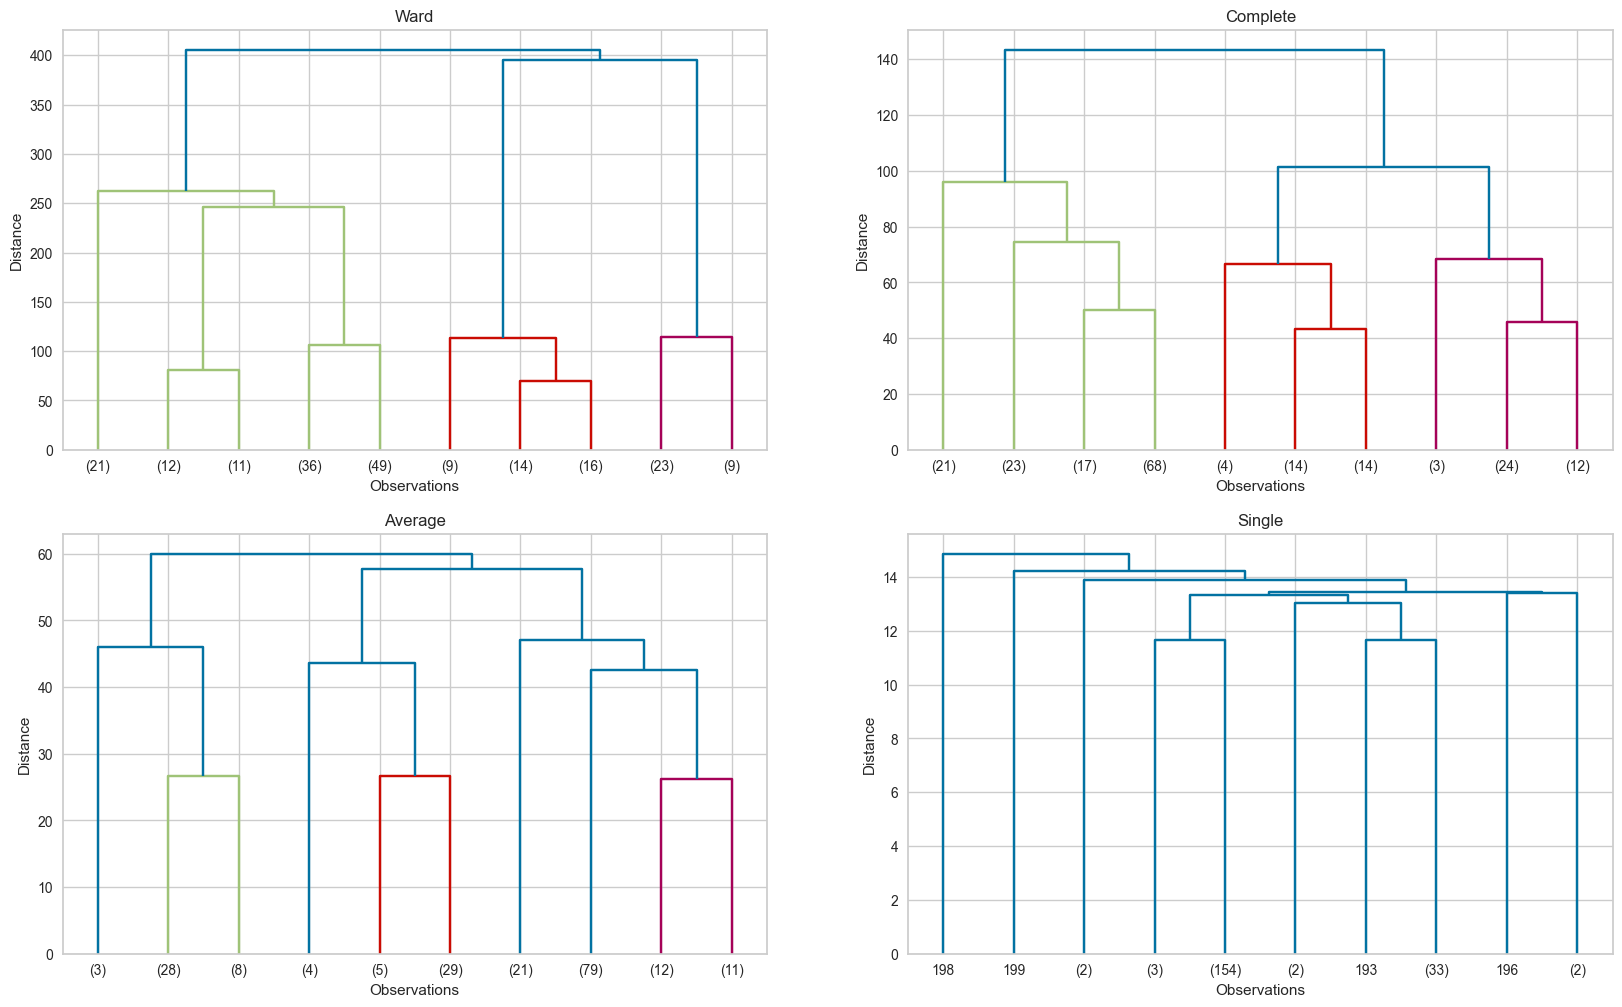

In [129]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10, truncate_mode='lastp', p=10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10, truncate_mode='lastp', p=10);

### ii. *Apply Agglomerative Clustering*

In [132]:
K = range(2,10)

for k in K:
    model1 = AgglomerativeClustering(n_clusters = k)
    model1.fit_predict(X2)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X2, model1.labels_)}')

Silhouette Score for 2 clusters: 0.36706444723912895
Silhouette Score for 3 clusters: 0.4618340266628975
Silhouette Score for 4 clusters: 0.4916598193892782
Silhouette Score for 5 clusters: 0.5529945955148897
Silhouette Score for 6 clusters: 0.5380208285578872
Silhouette Score for 7 clusters: 0.519904611908887
Silhouette Score for 8 clusters: 0.4326286245782246
Silhouette Score for 9 clusters: 0.43892545672004507


In [133]:
model2 = AgglomerativeClustering(n_clusters=5 ,affinity = "euclidean", linkage = "ward")
model2.fit_predict(X2)

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

In [134]:
X["cluster_2"] = model2.labels_
X

,Gender,Age,anual_income,spending_score,cluster,cluster_1,cluster_2
0,Male,19,15,39,2,0,4
1,Male,21,15,81,1,3,3
2,Female,20,16,6,2,2,4
3,Female,23,16,77,1,3,3
4,Female,31,17,40,2,0,4
...,...,...,...,...,...,...,...
195,Female,35,120,79,3,3,2
196,Female,45,126,28,0,0,0
197,Male,32,126,74,3,3,2
198,Male,32,137,18,0,2,0


### BASED ON CLUSTERS
### CLUSTER(0)

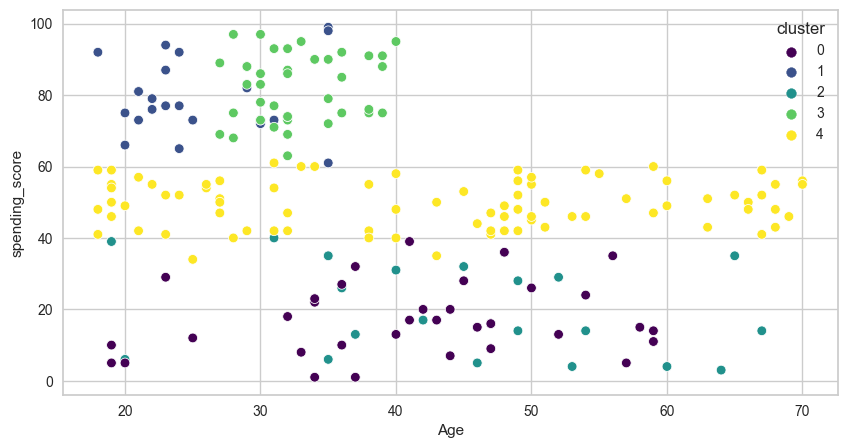

In [145]:
plt.figure(figsize=(10,5))
sns.scatterplot(X["Age"], 
                X["spending_score"], hue= X.cluster,palette= "viridis");

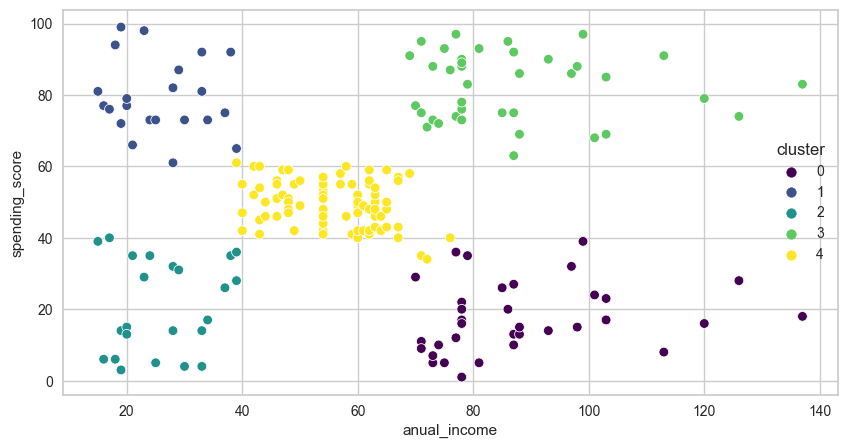

In [146]:
plt.figure(figsize=(10,5))
sns.scatterplot(X["anual_income"], 
                X["spending_score"], hue= X.cluster,palette= "viridis");

### CLUSTER 1 

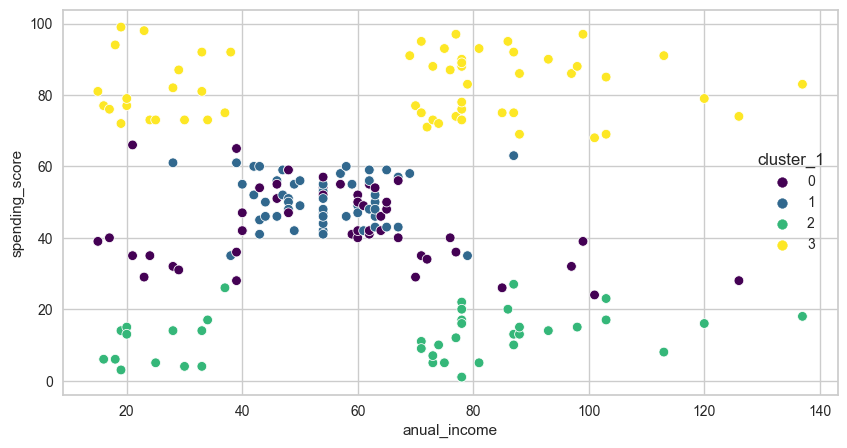

In [147]:
plt.figure(figsize=(10,5))
sns.scatterplot(X["anual_income"], 
                X["spending_score"], hue= X.cluster_1,palette= "viridis");

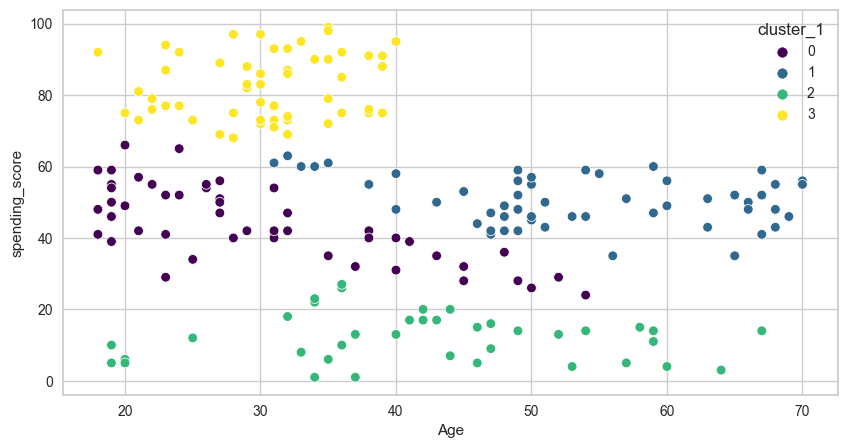

In [136]:
plt.figure(figsize=(10,5))
sns.scatterplot(X["Age"], 
                X["spending_score"], hue= X.cluster_1,palette= "viridis");

### CLUSTER 2

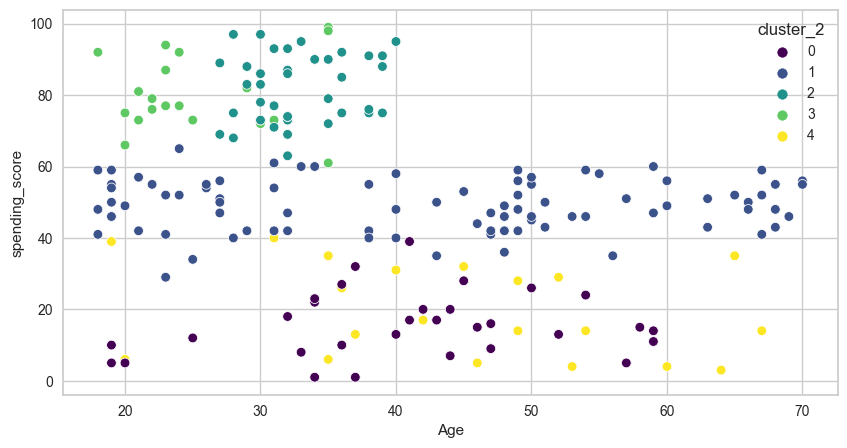

In [148]:
plt.figure(figsize=(10,5))
sns.scatterplot(X["Age"], 
                X["spending_score"], hue= X.cluster_2,palette= "viridis");

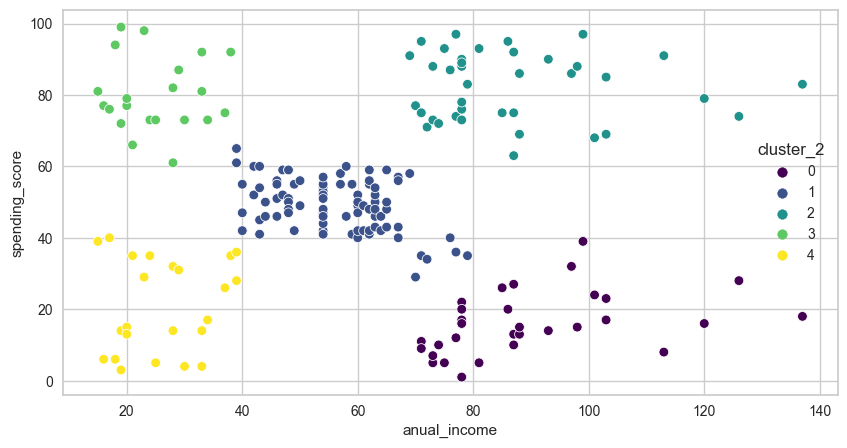

In [138]:
plt.figure(figsize=(10,5))
sns.scatterplot(X["anual_income"], 
                X["spending_score"], hue= X.cluster_2,palette= "viridis");

## Conclusion

___

<p style="text-align: center;"><img src="https://techproeducation.com/wp-content/uploads/2022/01/Calisma-Yuzeyi-1-kopya-5-1-768x126.png" class="img-fluid" alt="CLRSWY"></p>

___